<a href="https://colab.research.google.com/github/HJoonKwon/ml_fundamentals/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Nearest Neighbors Algorithm 
- A supervised learning algorithm 
- For classification and regression problems
- To predict for a new data point, we look to see the k closest labeled data points and classify the new data point as the majority class in those k points.

### Pros 
- Fast 
- Interpretable

### Cons
- Lack of capacity to adapt to highly complex relationships between independent(X) and dependent(y) variables.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import datasets 

from ml_algorithms.knearest_neighbors import * 

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Create the dataset

In [3]:
iris_data = datasets.load_iris() 

Iris data shape: (150, 4)
Iris target shape: (150,)
Iris targets are {0, 1, 2}


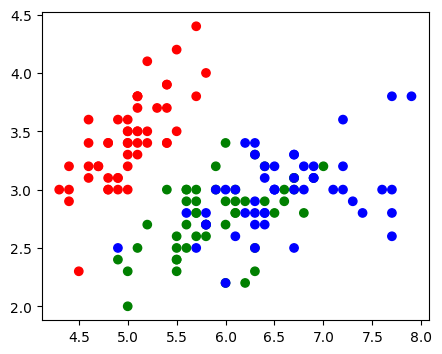

In [23]:
print(f"Iris data shape: {iris_data['data'].shape}")
print(f"Iris target shape: {iris_data['target'].shape}")
print(f"Iris targets are {set(iris_data['target'])}")

# Visualization for small test 
color_map = np.array(['r', 'g', 'b'])
plt.scatter(iris_data['data'][:,0], iris_data['data'][:,1], c=color_map[iris_data['target']])

## 2. Data preprocessing and split 

In [8]:
def normalize(data: np.ndarray):
    data = (data - np.mean(data, axis=0))/np.std(data, axis=0)
    return data 

In [9]:
from sklearn.model_selection import train_test_split

X = iris_data['data']
y = iris_data['target']

X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. KNN Implementation

In [21]:
import inspect
lines = inspect.getsource(KNearestNeighbors)
print(lines)

class KNearestNeighbors():
    def __init__(self):
        self.k = 5
        self.X_train: np.ndarray
        self.Y_train: np.ndarray

    def fit(self, X: np.ndarray, Y: np.ndarray, k: int) -> None:
        self.k = k
        self.X_train = X
        self.Y_train = Y

    def predict(self, X_test: np.ndarray) -> list:
        y_preds = []
        for x_test in X_test:
            distances = self.euclidean(x_test, self.X_train)
            y_sorted = [
                y for _, y in sorted(zip(distances, self.Y_train),
                                     key=lambda x: x[0])
            ]
            y_sorted_k = y_sorted[0:self.k]
            y_pred = self.most_common(y_sorted_k)
            y_preds.append(y_pred)
        return y_preds

    def euclidean(self, x_test: np.ndarray, X_train: np.ndarray):
        distances = np.linalg.norm(x_test - X_train, axis=1)
        return distances

    def most_common(self, y_sorted: list):
        y_counter = Counter(y_sorted)
        return 

## 4. Test KNN algorithm 

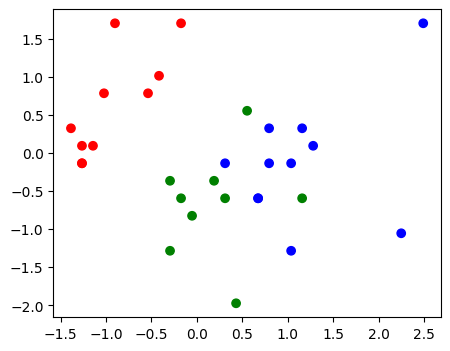

In [12]:
knn_model = KNearestNeighbors()
knn_model.fit(X_train, y_train, k=5)
preds = knn_model.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=color_map[preds])

In [13]:
accuracy = sum(preds==y_test)/len(y_test)
print(f'accuracy on test set is {accuracy}')

accuracy on test set is 1.0


### 4) Find the optimal k value using evaluation 

maximum accuracy: 1.0 @ k=28


Text(0, 0.5, 'Accuracy')

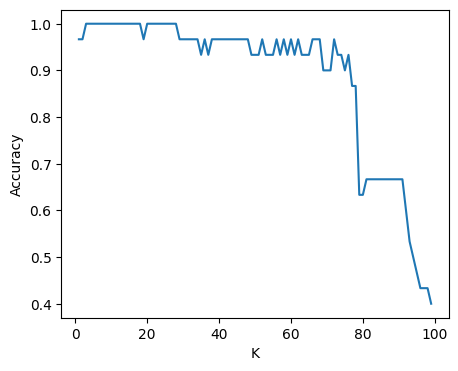

In [20]:
accuracies = [] 
k_candidates = range(1, 100)
knn_model = KNearestNeighbors()

for k in k_candidates:
    knn_model.fit(X_train, y_train, k=k)
    preds = knn_model.predict(X_test)
    acc = sum(preds==y_test)/len(y_test)
    accuracies.append(acc)

max_acc, optimal_k = max(zip(accuracies, k_candidates))
print(f'maximum accuracy: {max_acc} @ k={optimal_k}')

plt.plot(k_candidates, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')

## Reference
- https://towardsdatascience.com/k-nearest-neighbors-algorithm-in-python-by-example-79abc37a4443
- https://towardsdatascience.com/create-your-own-k-nearest-neighbors-algorithm-in-python-eb7093fc6339
- https://realpython.com/knn-python/